# Entangled States

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/introduction/entangled-states

## Product and entangled states

### Product States

Let's look at the state vector for |+0> below:

$+0> = \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}}(|00> + |10>)$

We notice that this state is in a superposition of two terms, |00> and |10>. Both of these states agree that the qubit on the right is in the state |0>, therefore all of the superposition is on the left qubit. The left qubit is in a superposition of |0> and |1> which is described by the |+> state. That is why this state is called |+0>, indicating the left qubit is in the state |+> and the right qubit is in the state |0>. Thus, <font color=orange>we have a **product state** meaning we can describe our two qubit state vector as a pair of single qubit states.</font>

We can formulate what product states look like by taking the product of their single qubit states. The general formula is:

$|a> = \begin{bmatrix}a_0 \\ a_1 \end{bmatrix} , |b> = \begin{bmatrix}b_0 \\ b_1 \end{bmatrix}$

$|ba> = \begin{bmatrix}b_0a_0 \\ b_0a_1 \\ b_1a_0 \\ b_1a_1 \end{bmatrix}$

This just follows from traditional probability rules of finding the probability of two _unrelated events_ and just multiplying their probabilities together.

<br>
<br>

### Entangled States

Let's now look at another state vector, $|\Phi^+>$:

$|\Phi^+> = \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}(|00> + |11>)$

The difference between $\Phi^+$ and the state vector shown before is that it _cannot_ be written as two separate, single qubits; there is just no set of $a_0$, $a_1$, $b_0$, and $b_1$ that would satisfy the state defined by $\Phi^+$. In all fields of numbers (real and complex), if the product of xy = 0 then x or y (or both) must be 0. Therefore, if $b_0*a_0$ is non-zero, we know both of those cannot be 0, and if $b_1*a_1$ is non-zero, then we know both of those cannot be 0. So how can $b_0*a_1$ and $b_1*a_0$ be zero if we just showed that $a_0$, $a_1$, $b_0$, and $b_1$ are all non-zero yet we need at least 1 zero in the $b_0*a_1$ and $b_1*a_0$ products for it to be zero? <font color=orange>Therefore, we simply _cannot_ write this is a product state becuase it is instead an **entangled state**.</font>

## Entangling gates

Single qubit gates will only create systems that are product states of the qubits; it is required to apply multi-qubit gates in order to create entanglement with cx and cz being common examples.

### The cx gate

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

Our state vector shows  we are in a state of [1, 0, 0, 0] meaning |00>. In order for entanglment to occur, our qubit(s) must be in a state  of superposition.

In [4]:
qc = QuantumCircuit(2)
qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [5]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

Now we've recreated the $|\Phi^+>$ state as described earlier.

### The cz gate

The cz gate is similar to the cx gate where a control qubit in state 0 does nothing to the target qubit and a control qubit in state 1 triggers a `z` to be performed on the target. However, the `z` operator does nothing to a qubit in state 0 and applies a phase of -1 to the state 1. So the cz gate only has an effect when _both_ the target and control qubits are in states |1>. We could have equally have defined the target as the control and the control as the target.

### The cx gate revisited

We can revist our interpretation of the CX gate as flipping the target qubit when the control is in a state |1>. For example, lets start with the case where both qubits are in the |+> state.

In [6]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],\n            dims=(2, 2))'

In [7]:
qc.cx(1, 0) # lists control, target qubits

ket = Statevector(qc)
ket.draw()

'Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],\n            dims=(2, 2))'

Regardless of which qubit we make the control and which we make the target, the output is still the same; there is no effect from the cx gate.

However, lets now look at the state where we put our target qubit in the |-> state by applying our z gate.

In [8]:
qc.z(0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],\n            dims=(2, 2))'

In [9]:
qc.cx(1, 0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],\n            dims=(2, 2))'

The statevector above can be rewritten as |--> meaning that our CX gate ended up flipping our _control_ qubit to |-> as well. <font color=orange>This effect is known as **phase kickback**, when there is a superposition on both the control and target quibits and some features of the target superposition can feed back into the control.</font>

This can also allow us to make an alternative interpretation of the CX; it applies a `z` to the control if the target is in state |-> and does nothing if it is in state |+>. 

## The power of entanglement

Entanglement is important to the algorithms and methods that provide a quantum advantage. Specific examples of entanglment in action are reviewed below.

## Entangled states and simulation

For n qubits, there are 2^n amplitudes to keep track of. However, if only single qubit gates are applied and there is no effects of entanglement, our state vector is a product vector meaning it can be represented by the 2 states for each n individual qubits. That is just 2*n which is much less than  2^n states. This is not unmanageable for a classical computer to process  so there is no quantum advantage here. Therefore, entanglement is a necessary ingredient for any quantum advantage.

## Qubits working together: Superdense coding

Lets look at an application of quantum communication. Suppose we have 2 people: Alice & Bob. Alice wishes to send a 2-bit message to Bob (00, 01, 10, or 11) and wants to do it by sending qubits. The simplest way to do this is with two qubits: encoding by using an `x` to flip the qubits to state 1 when needed and then all Bob has to do is measure them. This process did not involve any entanglement and provides no advantage over classical bits which can transmit n pieces of information in n bits.

We can instead look  at the case of adding an h  and cx gate  after encoding the information, as shown below:

In [10]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

This is our $\Phi^+$ state but there are other 2-qubit entangled states such as $\Phi^-$, $\Psi^+$, and $\Psi^-$. When Bob receives this particle, we simply can apply the h and cx gates to undo them and then can measure the message. However, again, if Bob has to measure 2 qubits to receive 2 bits of information, this does no better than our classical limit. If we look at our 4 entangled states, we see that they're all pretty closely related. For instance:

* $\Phi^+$ and $\Psi^+$ can be converted between each other by the application of an `x` on one of the qubits (11 + 00 --> 10 + 01); the same is true of $\Phi^-$ and $\Psi^-$

* $\Phi^+$ and $\Phi^-$ can also be converted between each other with the application of a `z` to introduce/remove a phase; the same is true between $\Psi^+$ and $\Psi^-$

So Alice could first create an entanlged state (say $\Phi^+$) and then modify it using `x` and `z` to encode the correct message. This puts us back into a similar position as the beginning except instead of encoding 00, 01, 10, or 11, Alice is encoding $\Phi^+$, $\Phi^-$, $\Psi^+$, or $\Psi^-$.

In [11]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

The important thing to note here though is that the `x` and `z` gates only need to be applied to a single qubit. This is different than the regular case of 00, 01, 10, and 11 because Alice could send qubit 0 to Bob as soon as she's created the entangled pair and then by applying a `z` or `x` gate on her single qubit, it would result in 4 possible outcome states to be measured. This is not the case if the qubits are not entangled; if a qubit in state 0 (or 1) is sent to Bob and then Alice encodes her qubit, then she can at most encode only 2 possible states since the qubit that was sent to Bob initially had a fixed/unrelated qubit state of 0 (or 1). Thus, Alice could only encode the states 01 or 00 (or 11 or 10). 

## Unique correlations: The Hardy paradox

Given a qubit, we can measure different aspects of it. For example, we can measure it z-basis and in the x-basis. However, unlike classical objects, which we can measure two aspects simultaneously and with definitive results (such as color and shape of an object), the same cannot be done for quantum objects.

A couple of quantum circuit examples showed the following results:

1. A qubit with certain output in the z-axis (such as the |0> state), has completely random output in the x-axis (50% in |+> and 50% in |->)

2. A qubit with certain output in the x-axis (such as the |+> state), has completely random output in the z-axis (50% in the |0> and 50% in the |1>)

3. A qubits can be rotated to have effects somewhere in the middle such that there is _some_ degree of certainty (but not total) of the output in 1 axis which will have a corresponding degree of certainty in an orthogonal axis.

To expand upon point 3, if we take a qubit in state |0> and apply a rotation about the y-axis of -pi/4, we will measure it in the |0> state about 85% of the time and in the |1> about ~15% of the time, and we will measure it in the |+> state 15% of the time and the |-> state about 85% of the time. Therefore, while we're not totally certain of the state in the z-axis, the measurement in the x-axis isn't completely random. 

Ultimately, <font color=orange>these observations reveal the effects of the **uncertainty princple**, which states that for pairs of attributes of a quantum system, it is impossible to know both with certainty.</font> . If the expecatation value of a qubit measured in the Z direction is as follows:

$<Z> = p_z(0) - p_z(1)$

then Z has a maximum value of 1 when we know it is in state 0 and has a minimum value of -1 when we know it is in state 1. For completely random results though, the expectation value of Z is 0. We can define the same for an expectation of measurement in the x-axis. Ultimately we find the following condition to always be true:

$<Z>^2 + <X>^2  \le 1$

## Unique quantum correlations

A third party generates a pair of qubits in an unknown state $\phi$ as described by the circuit below:

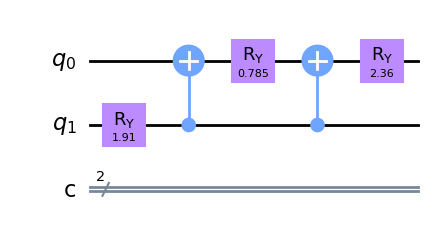

In [12]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw()

In [13]:
meas_zz = QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])

Results for z measurements:


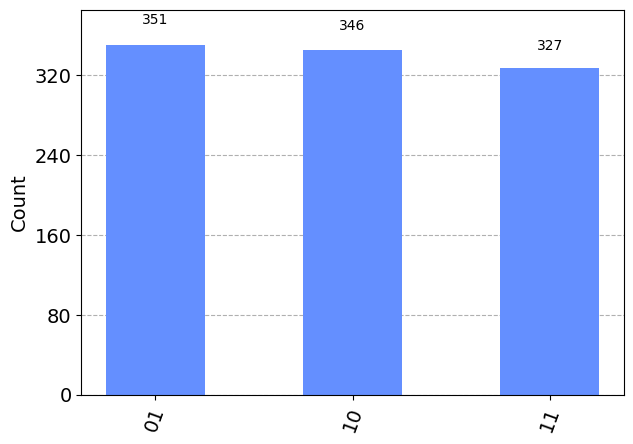

In [14]:
from qiskit import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')

print('Results for z measurements:')
counts = backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

Results for a z and an x measurement:


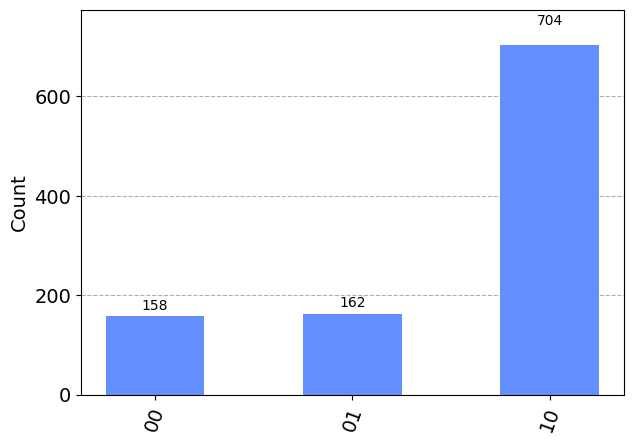

In [15]:
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])

print('Results for a z and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_zx)).result().get_counts()
plot_histogram(counts)

Alice and Bob do not know the state but they can make measurements on 1 qubit each and share their findings. From many samples of this 2-qubit quantum system state, they have deteremined the following correlations in their measurements as shown above:

* When both Alice & Bob do measurements in the z-axis, they are never both 0

* When one qubit is measured as 1 in the x-axis, a z measurement will always be 0 because we never observe any 11 results

Using the observations above, Alice & Bob think about what the results might be if the particles are both measured in the x direction. Since a measurement in the x-axis of 1 means a 0 measurement in the z direction and we know we never see both particles measured in the 0 state for z, they conclude that they will never seen both particles in the 11 state for the x measurement.

Results for an x and an x measurement:


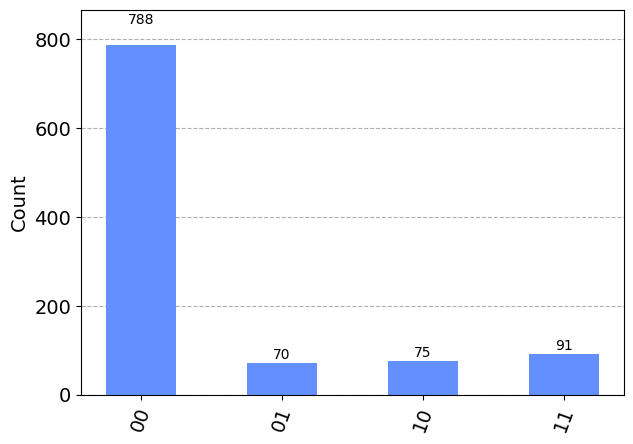

In [16]:
meas_xx = QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])

print('Results for an x and an x measurement:')
counts = backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)

However, this is wrong since we do see some probability of the particles being measured as 11 in the x-axis. This shows how the quantum probabilities work differently than what one would expect in the classical world.